In [1]:
from selenium import webdriver
import time
import random
from bs4 import BeautifulSoup
import re
from datetime import datetime
import pandas as pd
import seaborn as sns
import os

## Í≤ÄÏÉâÍ≤∞Í≥º Î∂àÎü¨Ïò§Í∏∞

In [6]:
def load_crwal_datas(fname):
    cpath = ""
    for p in fname:
        if ord(p) <= 255:
            cpath += p
    datas = pd.read_csv(cpath)
    return datas


In [7]:
fname = './data/Í≤ÄÏÉâÍ≤∞Í≥º_ÏïÑÎ¶¨Îî∞ÏõÄ_3000_12131056.csv'
datas = load_crwal_datas(fname)

In [3]:
def load_crwal_datas(fname):
import os
fname = './data/Í≤ÄÏÉâÍ≤∞Í≥º_ÏïÑÎ¶¨Îî∞ÏõÄ_3000_12131056.csv'

cpath = ""
for p in fname:
    if ord(p) <= 255:
        cpath += p

# os.rename(fname, cpath)
datas = pd.read_csv(cpath)

# datas = pd.read_csv(fname)

In [4]:
print(len(datas))

2999


In [12]:
datas.head()

writer                                            article  \
0   totokodeog_motd  Ïò§ÎäòÏùò Î¶Ω-#ÏïÑÎ¶¨Îî∞ÏõÄ #Ï†§Î¶¨Î∞î #Î©úÌåÖÏäà#ÌÜ†ÎãàÎ™®Î¶¨ #Î¶ΩÌÜ§Í≤üÏûáÌã¥Ìä∏ #Î†àÎìúÌï´#ÎÑòÎ≤Ñ7 #Ìïò...   
1  aritaum_official  [Î°úÎß®Ìã± ÌôÄÎ¶¨Îç∞Ïù¥_LET IT SNOW]ÏïÑÏßÅÎèÑ Í≤®Ïö∏ÎÑ§Ïùº Î≠êÌï†ÏßÄ Í≥†ÎØºÏ§ëÏù¥ÏãúÎùºÍµ¨Ïöî?-Ï∞®...   
2       fascinate_s  Ìò∏Ïûá ÏÉàÎ°úÏö¥ ÏïÑÏù¥Î©îÏù¥ÌÅ¨ÏóÖÏòÅÏÉÅÏù¥!!ÏõêÎ∏åÎûúÎìúÍøÄÏ°∞Ìï© Îã¥ÏïÑÎ¥§ÏúºÎãà Î∂àÌÜ†! Î∂àÏùº!Ïóê ÎèÑÏ†ÑÌï¥Î¥êÏöî...   
3    hanyulofficial  ÏûÖÏà†Ïù¥ Í∞àÎùºÏßÄÍ∏∞ Ïâ¨Ïö¥ Í≤®Ïö∏,#ÏûêÏó∞Í∞êÏÑ± ÏúºÎ°ú Ìñ•Í∏∞Î°≠Í≥† Ï¥âÏ¥âÌïòÍ≤å ÏºÄÏñ¥ÌïòÏÑ∏Ïöî. #ÏûêÏó∞ÏùÑÎãÆ...   
4       betweendots  Do you wait for your Black Friday and pre-Blac...   

    likes  replys_count                                             replys  \
0    4310             8  (1, 'themonthapril', '@aoibhok'), (2, 'discoso...   
1     537             1                                                '0'   
2  526402            55  (1, 'youngju42835', 'ÏòÅÏÉÅ Ïò¨ÎùºÏò§ÏûêÎßàÏûê Î∞îÎ°ú Î¥£ÏäµÎãàÎãπ~'), (2,...   
3     370             2  (1, 'ilovenail.wonju', 'Ïûò Î≥¥Í≥† Í∞ëÎãàÎã§‚úå'), (2, 'stto...   
4     202            11  (1, 'properrosy', 'I still have like 4 to come...   

           datetime                                                img  \
0  2017-12-09 13:04  https://scontent-icn1-1.cdninstagram.com/t51.2...   
1  2017-12-13 01:34  https://scontent-icn1-1.cdninstagram.com/t51.2...   
2  2017-12-01 10:40  https://scontent-icn1-1.cdninstagram.com/t51.2...   
3  2017-12-12 02:34  https://scontent-icn1-1.cdninstagram.com/t51.2...   
4  2017-12-12 19:33  https://scontent-icn1-1.cdninstagram.com/t51.2...   

                                                tags  
0  '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#Ï†§Î¶¨Î∞î', '#Î©úÌåÖÏäà', '#ÌÜ†ÎãàÎ™®Î¶¨', '#Î¶ΩÌÜ§Í≤üÏûáÌã¥Ìä∏', '...  
1  '#ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÑ§Ïùº', '#Ïó∞ÎßêÎÑ§Ïùº', '#Í≥†ÏöîÌïúÎ∞§', '#Î°úÎß®Ìã±ÌôÄÎ¶¨Îç∞Ïù¥', '#ÏÖÄÌîÑ...  
2  '#Î∑∞Ìã∞Ïú†ÌäúÎ≤Ñ', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#ÏÉâÏ°∞Ìï©', '#ÏïÑÏù¥Î©îÏù¥ÌÅ¨ÏóÖ', '#eyemak...  
3  '#ÏûêÏó∞Í∞êÏÑ±', '#ÏûêÏó∞ÏùÑÎãÆÏùÄÎ¶ΩÎ∞§_', '#ÌïúÏú®Î¶ΩÎ∞§', '#ÌïúÏú®ÏûêÏó∞ÌÖú', '#Î¶ΩÎ∞§'...  
4  '#aritaum', '#kbeauty', '#abcommunity', '#rasi...

In [6]:
# likesÏùò dtypes Í∞Ä int Í∞Ä ÏïÑÎãê Í≤ΩÏö∞
datas['likes'].fillna(0)

0         4310
1          537
2       526402
3          370
4          202
5         1909
6          677
7          167
8          689
9           18
10           3
11          26
12          10
13          39
14          35
15          13
16         230
17          15
18          31
19          37
20          18
21           1
22          16
23          34
24          33
25           4
26          33
27          42
28          30
29          18
         ...  
2969        80
2970       179
2971        32
2972        59
2973       195
2974       147
2975        29
2976        42
2977        34
2978        11
2979        54
2980        29
2981        11
2982       303
2983       362
2984        49
2985       100
2986        38
2987        55
2988        38
2989       145
2990        11
2991        24
2992        11
2993        18
2994       130
2995        17
2996        13
2997         3
2998         6
Name: likes, dtype: int64

In [5]:
datas.dtypes

writer          object
article         object
likes            int64
replys_count     int64
replys          object
datetime        object
img             object
tags            object
dtype: object

# Î∂ÑÏÑùÌïòÍ∏∞

### ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÌïòÍ∏∞

In [7]:
def insta_trends_analyser(datas):
    # datas: insta ÌÅ¨Î°§ Í≤∞Í≥º pandas ÏûêÎ£åÌòï ÌòïÌÉú
    datas['day'] = [date[:10] for date in datas['datetime']]    # #Ïõî/Ïùº Í∞íÎßå Ï∂îÍ∞Ä  2017-11-25ÌòïÌÉú
    
    trends = pd.DataFrame()
    trends['article'] = datas.groupby(datas['day'])['article'].count()  #  ÏùºÏûêÎ≥Ñ Ïù∏Ïä§ÌÉÄ Ìè¨Ïä§ÌåÖÏàò
    trends['replies'] = datas.groupby(datas['day'])['replys_count'].sum() # ÏùºÏûêÎ≥Ñ ÎåìÍ∏Ä ÏûëÏÑ±Ïàò
    trends['likes'] = datas.groupby(datas['day'])['likes'].sum()     # ÏùºÏûêÎ≥Ñ Ï¢ãÏïÑÏöî Ïàò
    trends['sum'] = trends.replies + trends.article + trends.likes
    
    return trends

In [8]:
insta_trends = insta_trends_analyser(datas)

In [15]:
insta_trends.head()

article  replies  likes   sum
day                                      
2017-11-10       12       28    471   511
2017-11-11       42      247   3456  3745
2017-11-12       53      385   6357  6795
2017-11-13       49      268   3092  3409
2017-11-14       45      291   4752  5088

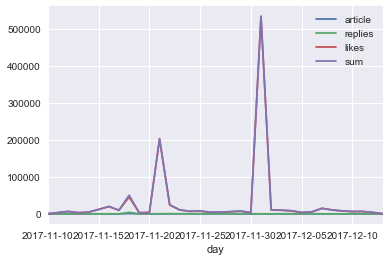

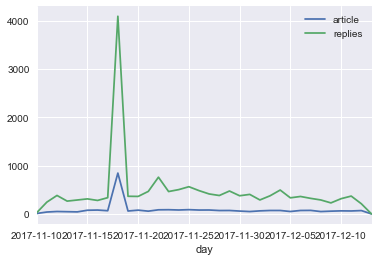

In [9]:
%matplotlib inline
# trends.plot(y = ['article','replys','sum'], ylim=(0,trends['sum'].max()))
insta_trends.plot(y = ['article','replies','likes','sum'])
insta_trends.plot(y = ['article','replies'])

### ÌÉúÍ∑∏ Î∂ÑÏÑùÌïòÍ∏∞: ÎπàÎèÑÏàò

In [10]:
# ÌÉúÍ∑∏ ÎπàÎèÑÏàò Í≥ÑÏÇ∞ÌïòÍ∏∞

from collections import Counter

def tag_counter(tag_lists):
    # Ïù∏Ïä§ÌÉÄ ÌÉúÍ∑∏ ÏàòÏßëÍ≤∞Í≥ºÎ•º ÏûÖÎ†•ÌïòÎ©¥, ÌÉúÍ∑∏ ÎπàÎèÑÏàò Ïπ¥Ïö¥Ìä∏Í∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Î≥¥Ïó¨Ï§å  
    # tag_lists = ["'#ÎùºÏù∏1ÌÉúÍ∑∏1'",    "'ÎùºÏù∏2ÌÉúÍ∑∏1', 'ÎùºÏù∏2ÌÉúÍ∑∏2', 'ÎùºÏù∏2ÌÉúÍ∑∏3'" ] ÌòïÏãù
    
    tag_counts = Counter()
    for tags in tag_lists:
        try: tag_counts.update(tags.replace("'",'').replace(' ','').strip().split(','),)
        except: continue
    tag_counts = tag_counts.most_common()  # Ï†ïÏó¥ÌïòÍ∏∞
    
    return tag_counts

In [11]:
# ÏÉÅÏúÑ ÌÉúÍ∑∏ Í∑∏Î¶ºÍ∑∏Î¶¨Í∏∞

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

def tag_counts_chart(tag_counts, n):
    # matplotlib ÌïúÍ∏Ä ÏÇ¨Ïö©ÌïòÍ∏∞
    font_location = 'c:/Windows/fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font',family=font_name)
    
    labels, values = [],[]
    for tags in reversed(tag_counts[:n]):   # Í∞ÄÎ°ú Í∑∏ÎûòÌîÑÏùº Í≤ΩÏö∞ÏóêÎäî reversed Î°ú ÏàúÏÑú Î≥ÄÍ≤ΩÌï¥Ï§ÄÎã§
        label, value = tags
        labels.append(label)
        values.append(value)

    indexes = np.arange(len(labels))
    width = 0.9
    fig = plt.figure(figsize = (8,6))
    plt.barh(indexes, values, width)  # ÏàòÌèâ Î∞î Í∑∏ÎûòÌîÑ
#     plt.yticks(indexes + width * 0.5, labels, rotation='0')
    plt.yticks(indexes, labels, rotation='0')

    # ÏÑ∏Î°úÍ∑∏ÎûòÌîÑÏùº Í≤ΩÏö∞
    # plt.bar(indexes, values, width)
    # plt.xticks(indexes + width * 0.5, labels, rotation='90') 
    plt.show()

### tagÎ∂ÑÏÑù: ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [13]:
# STOPWORD Ï†úÏô∏
def tag_counts_sellector(tag_counts, STOP):
    # STOP Îã®Ïñ¥Î•º Ï†úÏô∏ÌïòÏó¨  Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Ï∂úÎ†•Ìï®(Ïπ¥Ïö¥ÌÑ∞ --> Î¶¨Ïä§Ìä∏ ÌòïÌÉú Î≥ÄÍ≤ΩÎê®)
    tag_counts_e = []
    for word, count in tag_counts:
        if word not in STOP:
            tag_counts_e.append((word,count))
    return tag_counts_e

In [14]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def tag_wordcloud(tag_counts, word_num):
    tmp = dict(tag_counts[:word_num])
    wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.5, 
                        background_color="white", max_words=100).generate_from_frequencies(tmp)    #font_step=5
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud)
    plt.axis('off')

In [15]:
# ÌÉúÍ∑∏ ÎπàÎèÑ Î∂ÑÏÑù1: ÏßëÍ≥Ñ

tag_lists = datas['tags'].tolist() # Ïù∏Ïä§ÌÉÄ ÌÅ¨Î°§ÎßÅ Í≤∞Í≥º Ï§ë ÌÉúÍ∑∏Î•º Í∞ÄÏ†∏Ïò®Îã§
tag_counts = tag_counter(tag_lists)  # ÌÉúÍ∑∏ Ïπ¥Ïö¥Ìä∏ ÏßëÍ≥ÑÌïúÎã§
# tag_counts_chart(tag_counts, 20)    # ÏãúÍ∞ÅÌôî1) ÏÉÅÏúÑ ÌÉúÍ∑∏ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏Ìï®

for i,tag_count in enumerate(tag_counts[:30]):
    if i%5 ==0 : print('')
    print(tag_count[0], end=('/'))



#ÏïÑÎ¶¨Îî∞ÏõÄ/#ÏΩîÎçï/#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®/#ÌôîÏû•Ìíà/#ÏóêÎõ∞ÎìúÌïòÏö∞Ïä§/
#ÏùºÏÉÅ/#Î©îÏù¥ÌÅ¨ÏóÖ/#Îß•/#Ïù¥ÎãàÏä§ÌîÑÎ¶¨/#makeup/
#aritaum/#motd/#Î∑∞Ìã∞/#ÎØ∏ÏÉ§/#ÎùºÎÑ§Ï¶à/
#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®/#ÏóêÎõ∞Îìú/#cosmetics/#Îç∞ÏùºÎ¶¨/#ÎçîÌéòÏù¥Ïä§ÏÉµ/
#daily/#ÏÑ†Ìåî/#Ïñ¥Ìì®/#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®/#ÏΩîÏä§Î©îÌã±/
#ÎßûÌåî/#Ìã¥Ìä∏/#ÎßàÎ™ΩÎìú/#ÏÜåÌÜµ/#Î™®ÎÖ∏ÏïÑÏù¥Ï¶à/

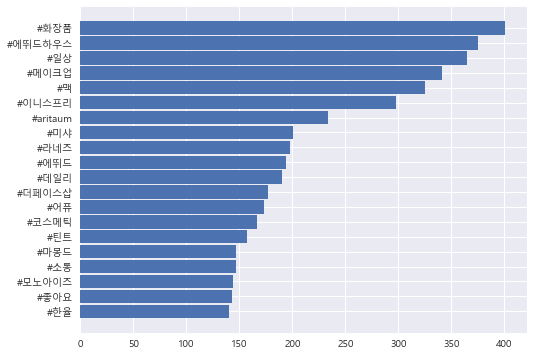

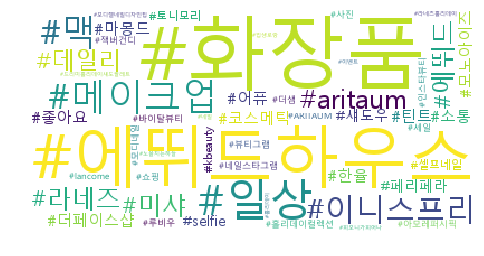

In [16]:
# ÌÉúÍ∑∏ ÎπàÎèÑ Î∂ÑÏÑù2: Ï†ïÎ¶¨ÌïòÍ∏∞
STOP = ['#ÏΩîÎçï', '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®', '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®', '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®', '#motd', '#eotd', '#makeupoftheday', '#ÎßûÌåî', 
        '#ÏÑ†Ìåî', '#ÌôîÏû•ÌíàÏä§ÌÉÄÍ∑∏Îû®', '#ÌåîÎ°úÏö∞', '#Ïò§ÎäòÏùòÌôîÏû•', '#Ïò§ÎäòÏùòÎ©îÏù¥ÌÅ¨ÏóÖ', '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', '#makeupoftheday', 
        '#ÏÑ†ÌåîÌôòÏòÅüôå', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#beauty', '#Î∑∞Ìã∞', '#cosmetics','#makeup', '#‰ªäÊó•„ÅÆ„É°„Ç§„ÇØ', '#daily', '#makeup',
       '#Î∑∞Ìã∞', '#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®', '#ÏáºÌïëÏä§ÌÉÄÍ∑∏Îû®','#MOTD', '#ÌïòÎäòÏïÑÎûòÍ∞ôÏùÄÏÉâÏ°∞ÎäîÏóÜÎã§' ]

tag_counts_selected = tag_counts_sellector(tag_counts, STOP)    # Î∂àÏö©Ïñ¥ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïúÎã§
tag_counts_chart(tag_counts_selected, 20)    # ÏãúÍ∞ÅÌôî1) ÏÉÅÏúÑ ÌÉúÍ∑∏ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏Ìï®
tag_wordcloud(tag_counts_selected,50)        # ÏãúÍ∞ÅÌôî2) ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞

## 2) SNA

In [17]:
# Îã®Ïñ¥ Í¥ÄÍ≥Ñ ÌñâÎ†¨ Ïì∞Í∏∞ 
from collections import Counter
from itertools import combinations


In [75]:
# Í≤åÏãúÍ∏ÄÎ≥Ñ ÌÉúÍ∑∏Î¶¨Ïä§Ìä∏ Ï†ïÎ¶¨ÌïúÎã§

def tag_lists_selector(tag_lists, STOP=[]):
    # Ïù∏Ïä§ÌÉÄ ÌÉúÍ∑∏ Í≤ÄÏÉâÍ≤∞Í≥º Ï§ë ÏùºÎ∂Ä
    
    tag_lists_sel = []
    for tags in tag_lists:
        tag_sel = tags.replace("'",'').replace(' ','').split(',')
        tag_lists_sel.append([tag for tag in tag_sel if tag not in STOP])
    return tag_lists_sel
  

In [19]:
# Îã®Ïñ¥ Í¥ÄÍ≥Ñ ÌñâÎ†¨ Ïì∞Í∏∞ 
from collections import Counter
from itertools import combinations


def word_matrix(tag_lists, stop=None, must=None):
    # Îß§Ìä∏Î¶≠Ïä§ ÎßåÎì§Í∏∞
    word_cooc_mat=Counter()
    for line in tag_lists:
        for word1, word2 in combinations(line,2):
            if stop!=None and (word1 in stop or word2 in stop): continue
            if must!=None and (word1 not in must and word2 not in must): continue
            if word1 == word2: continue  #ÎèôÏùºÌïú Îã®Ïñ¥Í∞ÑÏùò Î≤°ÌÑ∞Îäî Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÏùå
            elif word_cooc_mat[(word2,word1)]>=1:word_cooc_mat[(word2,word1)]+=1
            else: word_cooc_mat[(word1,word2)]+=1    
    
    word_coocs = []
    for words, count in word_cooc_mat.items():
        word_coocs.append((words[0],words[1],count))
    
    sorted_word_coocs = sorted(word_coocs, key=lambda x: x[2], reverse=True)   # Ï†ïÎ†¨ÌïòÍ∏∞
    
    return sorted_word_coocs

In [82]:
#Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
import networkx as nx
import matplotlib.pyplot as plt
import sys

def word_sna_graph(word_matrix, n, fname=None):
    G= nx.Graph()
    for word1, word2, count in word_matrix[:n]:    #ÏÉÅÏúÑ nÍ∞úÎ°úÎßå Í∑∏Î¶º Í∑∏Î¶¨Í∏∞
        G.add_edge(word1, word2, weight=count)
    T = nx.minimum_spanning_tree(G)
    nodes = nx.nodes(T)
    degrees = nx.degree(T)
    node_size = []

    for node in nodes:
        ns = degrees[node]*200
        node_size.append(ns)

    if sys.platform in ["win32", "win64"]: font_name = "malgun gothic"
    elif sys.platform == "darwin": fornt_name = "AppleGothic"
    plt.figure(figsize=(12,10))    
    nx.draw(T,
           pos=nx.fruchterman_reingold_layout(G, k=0.5),
           node_size=node_size,
           node_color="#42FC0A",   #ÎÖ∏ÎûÄÏÉâ: "#FFE27F"
            # http://www.colourlovers.com/palettes/add  ÏóêÏÑú ÏÉâÏÉÅ Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏùå
           font_family=font_name,
           label_pos=0, #0=head, 0.5=center, 1=tail
            with_labels=True,
            font_size=10 )
    if fname!=None: 
        plt.savefig(fname)
        print('{}Ïóê Ï†ÄÏû•ÌïòÏòÄÏäµÎãàÎã§'.format(fname))
    plt.axis("off")

    plt.show()    

In [21]:

STOP = ['#ÏΩîÎçï', '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®', '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®', '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®', '#motd', '#eotd', '#makeupoftheday', '#ÎßûÌåî', 
        '#ÏÑ†Ìåî', '#ÌôîÏû•ÌíàÏä§ÌÉÄÍ∑∏Îû®', '#ÌåîÎ°úÏö∞', '#Ïò§ÎäòÏùòÌôîÏû•', '#Ïò§ÎäòÏùòÎ©îÏù¥ÌÅ¨ÏóÖ', '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', '#makeupoftheday', 
        '#ÏÑ†ÌåîÌôòÏòÅüôå', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#beauty', '#Î∑∞Ìã∞', '#cosmetics','#makeup', '#‰ªäÊó•„ÅÆ„É°„Ç§„ÇØ', '#daily', '#makeup',
       '#aritaum', '#Î∑∞Ìã∞', '#ARITAUM', '#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®']
print(STOP)

['#ÏΩîÎçï', '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®', '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®', '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®', '#motd', '#eotd', '#makeupoftheday', '#ÎßûÌåî', '#ÏÑ†Ìåî', '#ÌôîÏû•ÌíàÏä§ÌÉÄÍ∑∏Îû®', '#ÌåîÎ°úÏö∞', '#Ïò§ÎäòÏùòÌôîÏû•', '#Ïò§ÎäòÏùòÎ©îÏù¥ÌÅ¨ÏóÖ', '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', '#makeupoftheday', '#ÏÑ†ÌåîÌôòÏòÅüôå', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#beauty', '#Î∑∞Ìã∞', '#cosmetics', '#makeup', '#‰ªäÊó•„ÅÆ„É°„Ç§„ÇØ', '#daily', '#makeup', '#aritaum', '#Î∑∞Ìã∞', '#ARITAUM', '#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®']


In [62]:
# tag ÎπàÎèÑÏàò Ï†êÍ≤Ä(STOP Ï†úÏô∏)
for i,tag_count in enumerate(tag_counts[100:200]):
    if i%5 ==0 : print('')
    if tag_count[0] not in STOP: print(tag_count[0], end=('/'))


#Î¶ΩÏä§Ìã±/#ÎùºÎÑ§Ï¶àÌôÄÎ¶¨Îç∞Ïù¥ÌååÌã∞/#ÎùºÎÑ§Ï¶àÌôÄÎ¶¨Îç∞Ïù¥Ìà¨ÌÜ§Î¶ΩÎ∞î/#ÎùºÎÑ§Ï¶àÌôÄÎ¶¨Îç∞Ïù¥Ïø†ÏÖòÎ∏îÎü¨ÏÖî/#ÏÑ†ÌåîÎßûÌåîÌôòÏòÅ/
#photo/#korea/#Îç∞ÏùºÎ¶¨Îâ¥Ìä∏Î¶¨ÏÖò/#ÂåñÁ≤ßÂìÅ/#ÌååÏö∞ÎçîÎ£∏Ïù¥Î≤§Ìä∏/
#ÌååÏö∞ÎçîÎ£∏Ï≤¥ÌóòÎã®/#ÏïÑÏù¥Ìè∞/#love/#Î∞îÎîîÎ°úÏÖò/#ÏùºÎ¶¨Ïú§/
#beautiful/#ÎØ∏Ïä§Ìä∏/#Ïñ¥Î¶∞Ïë•/#Ïπ¥ÎÖ∏ÏïÑÏù¥/#eyemakeupoftheday/
#powderroom/#ÏùºÎ¶¨Ïú§ÏÑ∏ÎùºÎßàÏù¥ÎìúÏïÑÌÜ†Î°úÏÖò/#ÎùºÎÑ§Ï¶àÎçîÎ∏îÎ†àÏù¥Ïñ¥ÎßÅÏò§Ïùº/#ÏóêÎõ∞ÎìúÏàúÏ†ï/#Í∏∞Ï¥àÏ†úÌíà/
#ÎÇòÎÇòÏßÄÎ¶Ñ/#ÏïÑÏù¥Ïò§Ìéò/#Î∂ôÏù¥ÎäîÏ†§ÎÑ§Ïùº/#ÏáºÌïëÏä§ÌÉÄÍ∑∏Îû®/#Ìã¥Ìä∏Ïù∏ÏõåÌÑ∞/
#black/#ÌôîÏû•/#make/#ÌïúÏ†ïÏÑÄÎèÑÌåîÎ†àÌä∏/#ÎßàÏπ¥Î°±/
#ÏïÑÏù¥Î©îÏù¥ÌÅ¨ÏóÖ/#ÌíàÏúÑÏûàÎäîÍ∑∏ÎÖÄ/#hot/#star/#ÏÑ¨Ï¥ùÏÇ¨üèù/
#ÈáëÂñúÂñÑ/#kimheeseon/#ÌûåÏßÄÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏/#princess/#game/
#lovely/#Style/#movie/#sexy/#onepiece/
#rose/#apple/#ÌôÄÎ¶¨Ïπ¥ÌôÄÎ¶¨Ïπ¥/#MOTD/#„ÉÜ„Ç£„É≥„Éà/
#ÏùµÏÇ∞/#Î™®Îîî/#‰ªäÊó•„ÅÆ„É™„ÉÉ„Éó/#„É™„ÉÉ„Éó/#„É©„É≥„Ç≥„É†/
#„Ç∏„É•„Éº„Ç∑„Éº„Ç∑„Çß„Ç§„Ç´„Éº/#juicyshaker/#ÏùºÏÇ∞/#Ïõ®Ïä§ÌÑ¥Îèî/#ÎùºÌéòÏä§ÌÉÄ/
#ÏÜåÌÜµÎèàÏì∞Í∏∞üòò/#ÏßÑÏ†ïÏàò

In [9]:
STOP = ['#ÏΩîÎçï', '#Î∑∞Ìã∞Ïä§ÌÉÄÍ∑∏Îû®', '#ÏΩîÎçïÏä§ÌÉÄÍ∑∏Îû®', '#Î∑∞Ïä§ÌÉÄÍ∑∏Îû®', '#motd', '#eotd', '#makeupoftheday', '#ÎßûÌåî', 
        '#ÏÑ†Ìåî', '#ÌôîÏû•ÌíàÏä§ÌÉÄÍ∑∏Îû®', '#ÌåîÎ°úÏö∞', '#Ïò§ÎäòÏùòÌôîÏû•', '#Ïò§ÎäòÏùòÎ©îÏù¥ÌÅ¨ÏóÖ', '#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', '#makeupoftheday', 
        '#ÏÑ†ÌåîÌôòÏòÅüôå', '#ÏïÑÎ¶¨Îî∞ÏõÄ', '#beauty', '#Î∑∞Ìã∞', '#cosmetics','#makeup', '#‰ªäÊó•„ÅÆ„É°„Ç§„ÇØ', '#daily', '#makeup',
       '#Î∑∞Ìã∞', '#ÏÖÄÏä§ÌÉÄÍ∑∏Îû®', '#ÏáºÌïëÏä§ÌÉÄÍ∑∏Îû®','#MOTD', '#ÌïòÎäòÏïÑÎûòÍ∞ôÏùÄÏÉâÏ°∞ÎäîÏóÜÎã§' ]
# must = ['#Í∞ïÏïÑÏßÄÏäµÏßÑ', '#Í∞ïÏïÑÏßÄÏÉ¥Ìë∏','#Í∞ïÏïÑÏßÄÎπÑÎàÑ']

must = None

tags_raw = datas['tags'].dropna().tolist() # Ïù∏Ïä§ÌÉÄ ÌÅ¨Î°§ÎßÅ Í≤∞Í≥º Ï§ë ÌÉúÍ∑∏Î•º Í∞ÄÏ†∏Ïò®Îã§
tag_lists = tag_lists_selector(tags_raw)
word_cooc = word_matrix(tag_lists, stop=STOP, must=must)
print(word_cooc[:20])

fname = './data/ÏïÑÎ¶¨Îî∞ÏõÄv4'
word_sna_graph(word_cooc,70,fname) #Ï†ÄÏû•Ìï†Í≤ΩÏö∞

# word_sna_graph(word_cooc,200)


NameError: name 'tag_lists_selector' is not defined

In [40]:
# ÌäπÏ†ïÎã®Ïñ¥ Ìä∏ÎûúÎìú Î∂ÑÏÑù

In [25]:
def insta_trends_word(datas, word):
    datas['day'] = [date[:10] for date in datas['datetime']]    # #Ïõî/Ïùº Í∞íÎßå Ï∂îÍ∞Ä  2017-11-25ÌòïÌÉú
    check = [word in str(tags) for tags in datas.tags]

    trends = pd.DataFrame()
    trends['article'] = datas[check].groupby(datas['day'])['article'].count()  #  ÏùºÏûêÎ≥Ñ Ïù∏Ïä§ÌÉÄ Ìè¨Ïä§ÌåÖÏàò
    trends['replies'] = datas[check].groupby(datas['day'])['replys_count'].sum() # ÏùºÏûêÎ≥Ñ ÎåìÍ∏Ä ÏûëÏÑ±Ïàò
    trends['likes'] = datas[check].groupby(datas['day'])['likes'].sum()     # ÏùºÏûêÎ≥Ñ Ï¢ãÏïÑÏöî Ïàò
    trends['sum'] = trends.replies + trends.article + trends.likes
    
    return trends

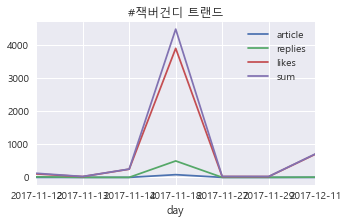

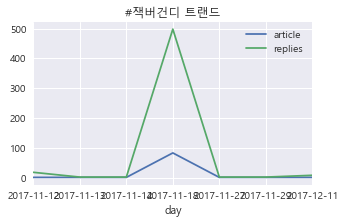

In [70]:
WORD = '#Ïû≠Î≤ÑÍ±¥Îîî'
word_trends = insta_trends_word(datas, WORD)
word_trends.plot(y = ['article','replies','likes','sum'], title = '{} Ìä∏ÎûúÎìú'.format(WORD), figsize=(5,3))
word_trends.plot(y = ['article','replies'], title = '{} Ìä∏ÎûúÎìú'.format(WORD),figsize=(5,3))

### ÏõåÎìú ÏûÑÎ≤†Îî©

In [26]:
#ÏõåÎìúÏûÑÎ≤†Îî© Î™®Îç∏ ÏÉùÏÑ±ÌïòÍ∏∞
import gensim
from gensim.models import Word2Vec


In [8]:
#ÏõåÎìúÌà¨Î∞± Î™®Îç∏ ÏÉùÏÑ±ÌïòÍ∏∞
def make_word2vec(tags_raw, STOP=[]):
    tag_lists_selected = tag_lists_selector(tags_raw, STOP=STOP)  #stop Ï†úÏô∏Ìïú ÌÉúÍ∑∏Î¶¨Ïä§Ìä∏
    model = Word2Vec(tag_lists_selected, size=100, window=10, min_count=5)
    return model

model = make_word2vec(tags_raw, STOP=STOP)

NameError: name 'tags_raw' is not defined

In [62]:
#Ïú†ÏÇ¨Îã®Ïñ¥ Ï∞æÍ∏∞ Ìï®Ïàò
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

def word2vec_similar(model, word, topn=20):
    # matplotlib ÌïúÍ∏Ä ÏÇ¨Ïö©ÌïòÍ∏∞
    font_location = 'c:/Windows/fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font',family=font_name)
    
    labels, values = [],[]
    for tags in reversed(model.wv.most_similar(word, topn=topn)):   # Í∞ÄÎ°ú Í∑∏ÎûòÌîÑÏùº Í≤ΩÏö∞ÏóêÎäî reversed Î°ú ÏàúÏÑú Î≥ÄÍ≤ΩÌï¥Ï§ÄÎã§
        label, value = tags
        labels.append(label)
        values.append(value)
        
    indexes = np.arange(len(labels))
    width = 0.9
    fig = plt.figure(figsize = (5,4))
    plt.barh(indexes, values, width)  # ÏàòÌèâ Î∞î Í∑∏ÎûòÌîÑ
    plt.yticks(indexes, labels, rotation='0')
    low = min(values)
    high = max(values)
    plt.xlim([(low-1.5*(high-low)),1])
    plt.title('{}ÏôÄ Ìï®Íªò ÏÇ¨Ïö©Îêú Îã®Ïñ¥ Top{}'.format(word,topn))


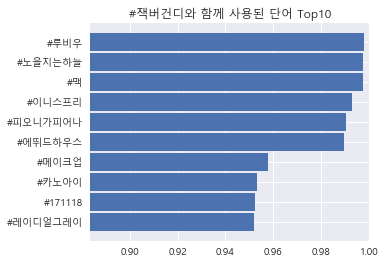

In [86]:
word2vec_similar(model, '#Ïû≠Î≤ÑÍ±¥Îîî', topn=10)

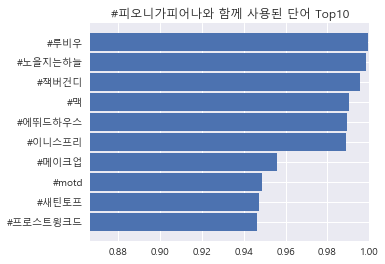

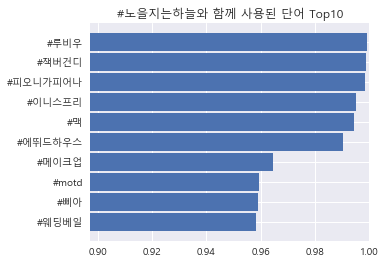

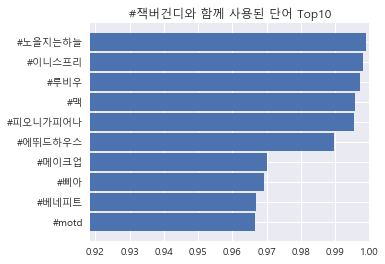

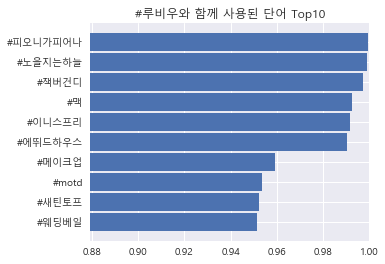

In [68]:
# Ïú†ÏÇ¨Îã®Ïñ¥ ÌôïÏù∏Ìï† Îã®Ïñ¥ ÏÑ†ÌÉùÌï®
# tag_counts_sellector = tag_counts_sellector(tag_counts, STOP)
# selected_words = tag_counts_selected[:10]
# for tag in selected_words:
#     most_similar(model, tag[0], topn=10)


selected_words = ['#ÌîºÏò§ÎãàÍ∞ÄÌîºÏñ¥ÎÇò', '#ÎÖ∏ÏùÑÏßÄÎäîÌïòÎäò','#Ïû≠Î≤ÑÍ±¥Îîî','#Î£®ÎπÑÏö∞']
for word in selected_words:
    word2vec_similar(model, word, topn=10)
